In [ ]:
import yfinance as yf

# Download historical data for Apple (AAPL)
apple_data = yf.download("AAPL", start="2012-01-01", end="2022-01-01")
closing_prices = apple_data['Close']

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


To get minute-by-minute data using yfinance, you can use the yf.download() function with the interval parameter set to a specific frequency. Here’s how you can do it:

In [ ]:
# Downloading 1-minute interval data for Apple (AAPL)
apple_minute_data = yf.download("AAPL", start="2023-08-01", end="2023-08-02", interval="1m")

####Preprocessing

In [ ]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler

In [ ]:
# Normalize data
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(closing_prices)


In [ ]:
# Sequence generator
def create_sequences(data, time_step=60):
    X, y = [], []
    for i in range(time_step, len(data)):
        X.append(data[i - time_step:i, 0])
        y.append(data[i, 0])
    return np.array(X), np.array(y)

X, y = create_sequences(scaled_data)


In [ ]:
# Reshape X to be [samples, time_steps, features]
X = X.reshape((X.shape[0], X.shape[1], 1))


print(f"X shape: {X.shape}, y shape: {y.shape}")

X shape: (2457, 60, 1), y shape: (2457,)


In [ ]:
# Train-test split (80-20)
split = int(0.8 * len(X))
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

#### models Train & Eval

In [ ]:
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, SimpleRNN, LSTM, GRU, Bidirectional
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
def run_rnn():
    model = Sequential()
    model.add(SimpleRNN(50, input_shape=(60, 1)))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mean_squared_error')

    es = EarlyStopping(patience=10, restore_best_weights=True)
    history = model.fit(X_train, y_train, epochs=50, batch_size=32,
                        validation_split=0.1, callbacks=[es], verbose=0)

    pred = model.predict(X_test)
    mse = mean_squared_error(y_test, pred)
    print(f"RNN MSE: {mse:.5f}")

    plt.figure(figsize=(10,4))
    plt.plot(scaler.inverse_transform(y_test.reshape(-1, 1)), label='Actual')
    plt.plot(scaler.inverse_transform(pred), label='Predicted')
    plt.title("RNN Prediction vs Actual")
    plt.legend()
    plt.show()

    plt.figure()
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Val Loss')
    plt.title("RNN Training Loss")
    plt.legend()
    plt.show()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
/usr/local/lib/python3.11/dist-packages/tensorflow/python/data/ops/structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(
ERROR:tensorflow:==================================
Object was never used (type <class 'tensorflow.python.ops.tensor_array_ops.TensorArray'>):
If you want to mark it as used call its "mark_used()" method.
It was originally created here:
  File "/usr/local/lib/python3.11/dist-packages/keras/src/backend/tensorflow/rnn.py", line 418, in <genexpr>
    output_ta_

16/16 ━━━━━━━━━━━━━━━━━━━━ 3s 219ms/step
RNN MSE: 0.00155


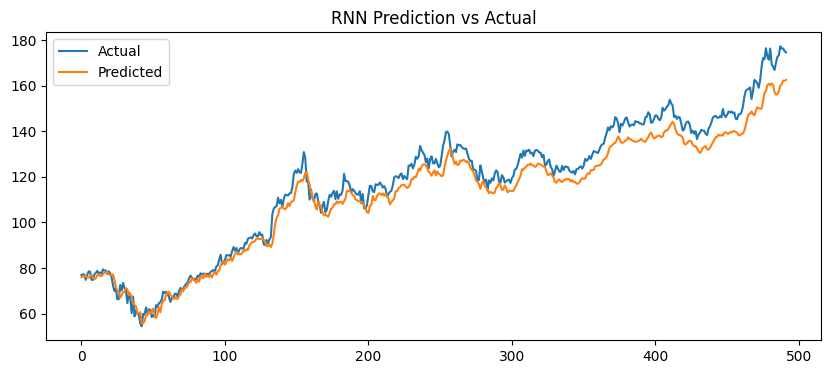

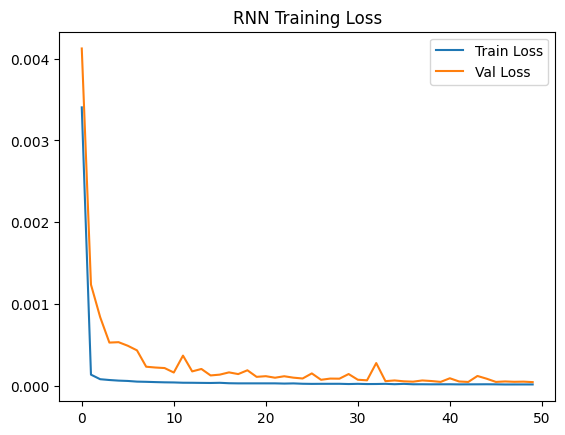

In [ ]:
run_rnn()

In [ ]:
def run_gru():
    model = tf.keras.Sequential()
    model.add(GRU(50, input_shape=(60, 1)))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mean_squared_error')

    es = EarlyStopping(patience=10, restore_best_weights=True)
    history = model.fit(X_train, y_train, epochs=50, batch_size=32,
                        validation_split=0.1, callbacks=[es], verbose=0)

    pred = model.predict(X_test)
    mse = mean_squared_error(y_test, pred)
    print(f"GRU MSE: {mse:.5f}")

    plt.figure(figsize=(10,4))
    plt.plot(scaler.inverse_transform(y_test.reshape(-1, 1)), label='Actual')
    plt.plot(scaler.inverse_transform(pred), label='Predicted')
    plt.title("GRU Prediction vs Actual")
    plt.legend()
    plt.show()

    plt.figure()
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Val Loss')
    plt.title("GRU Training Loss")
    plt.legend()
    plt.show()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step
GRU MSE: 0.00032


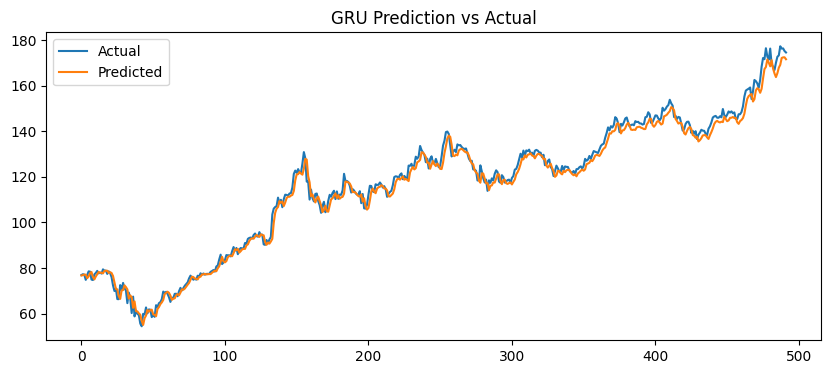

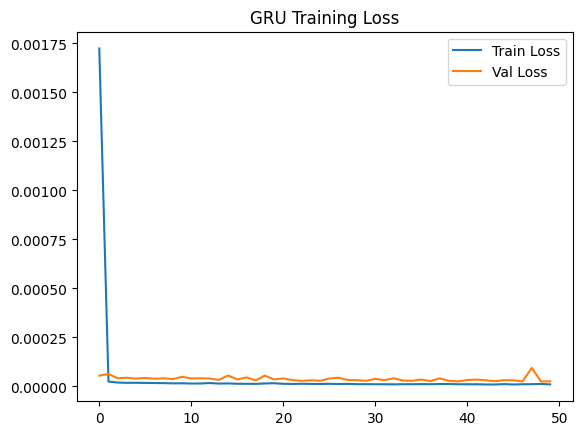

In [ ]:
run_gru()

In [ ]:
def run_lstm():
    model = Sequential()
    model.add(LSTM(50, input_shape=(60, 1)))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mean_squared_error')

    es = EarlyStopping(patience=10, restore_best_weights=True)
    history = model.fit(X_train, y_train, epochs=50, batch_size=32,
                        validation_split=0.1, callbacks=[es], verbose=0)

    pred = model.predict(X_test)
    mse = mean_squared_error(y_test, pred)
    print(f"LSTM MSE: {mse:.5f}")

    plt.figure(figsize=(10,4))
    plt.plot(scaler.inverse_transform(y_test.reshape(-1, 1)), label='Actual')
    plt.plot(scaler.inverse_transform(pred), label='Predicted')
    plt.title("LSTM Prediction vs Actual")
    plt.legend()
    plt.show()

    plt.figure()
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Val Loss')
    plt.title("LSTM Training Loss")
    plt.legend()
    plt.show()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
LSTM MSE: 0.00050


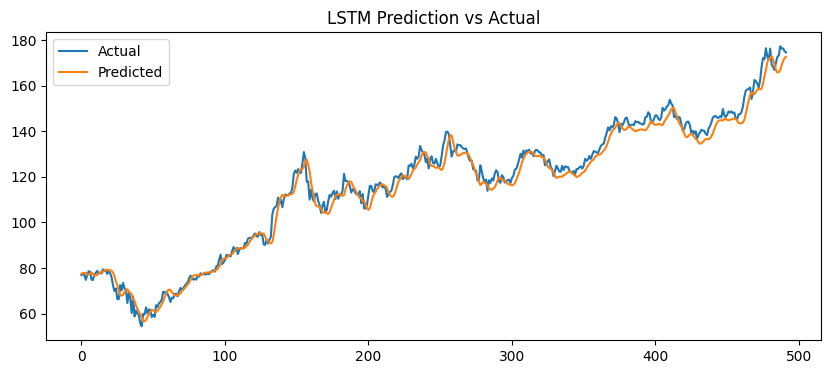

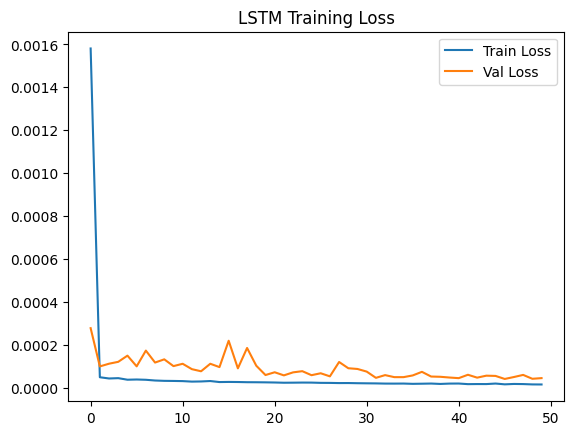

In [ ]:
run_lstm()

In [ ]:
def run_bilstm():
    model = Sequential()
    model.add(Bidirectional(LSTM(50), input_shape=(60, 1)))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mean_squared_error')

    es = EarlyStopping(patience=10, restore_best_weights=True)
    history = model.fit(X_train, y_train, epochs=50, batch_size=32,
                        validation_split=0.1, callbacks=[es], verbose=0)

    pred = model.predict(X_test)
    mse = mean_squared_error(y_test, pred)
    print(f"Bidirectional LSTM MSE: {mse:.5f}")

    plt.figure(figsize=(10,4))
    plt.plot(scaler.inverse_transform(y_test.reshape(-1, 1)), label='Actual')
    plt.plot(scaler.inverse_transform(pred), label='Predicted')
    plt.title("Bidirectional LSTM Prediction vs Actual")
    plt.legend()
    plt.show()

    plt.figure()
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Val Loss')
    plt.title("Bidirectional LSTM Training Loss")
    plt.legend()
    plt.show()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/bidirectional.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
Bidirectional LSTM MSE: 0.00591


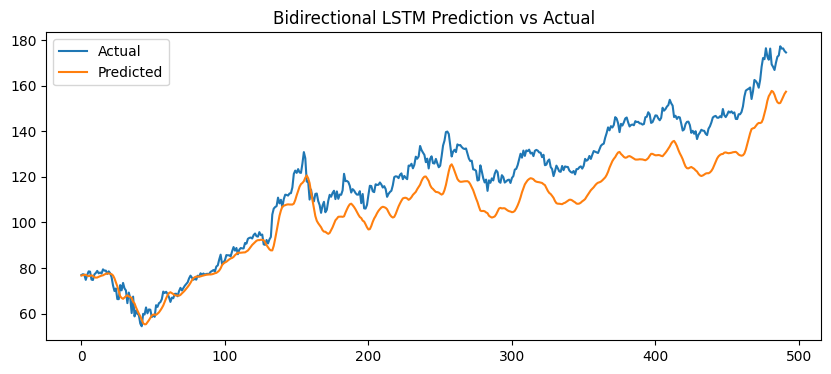

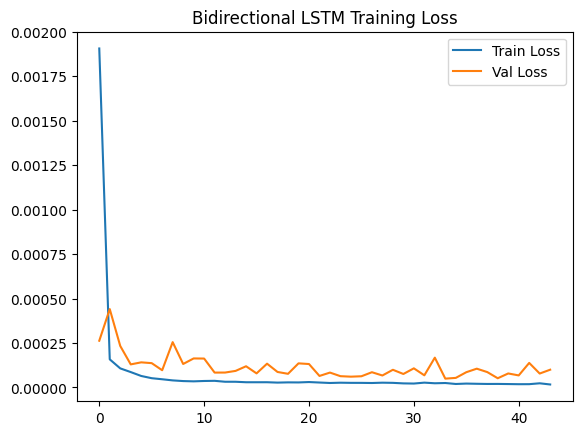

In [ ]:
run_bilstm()

# Final Report:


## 📈 Stock Price Prediction using RNN, GRU, LSTM, and Bidirectional LSTM

### 🔍 **1. Project Overview**

This project aims to predict future prices of Apple Inc. stock using historical data, leveraging various Recurrent Neural Network (RNN) architectures including:

- Standard RNN
- Gated Recurrent Unit (GRU)
- Long Short-Term Memory (LSTM)
- Bidirectional LSTM (BiLSTM)

The models are trained and evaluated independently to understand their predictive power and compare their effectiveness using Mean Squared Error (MSE) and visualization methods.

---

### 📊 **2. Data Collection**

We utilized the [Yahoo Finance](https://finance.yahoo.com) API through the `yfinance` Python library to fetch two types of Apple stock data:

- **Daily close price** data from **2012-01-01 to 2022-01-01**
- **1-minute interval** data for **2023-08-01** (optional: for high-frequency trading exploration)

```python
import yfinance as yf

# Daily data (10 years)
apple_data = yf.download("AAPL", start="2012-01-01", end="2022-01-01")
closing_prices = apple_data["Close"].values

# Minute data (for optional extension)
apple_minute_data = yf.download("AAPL", start="2023-08-01", end="2023-08-02", interval="1m")
```

---

### 🧹 **3. Data Preprocessing**

- **Normalization**: Using `MinMaxScaler` to scale closing prices between 0 and 1.
- **Sequence Generation**: Creating 60-step input sequences to predict the next time step.
- **Train/Test Split**: 80% for training and 20% for testing.

Shape of the data after preprocessing:
- Input: `(samples, 60, 1)`
- Output: `(samples,)`

---

### 🧠 **4. Model Architectures**

Each model uses the same input sequence length and ends with a dense layer to predict the next value.

- **Basic RNN**
```python
model.add(SimpleRNN(50))
```

- **GRU**
```python
model.add(GRU(50))
```

- **LSTM**
```python
model.add(LSTM(50))
```

- **Bidirectional LSTM**
```python
model.add(Bidirectional(LSTM(50)))
```

All models use:
- `Adam` optimizer
- `MeanSquaredError` loss
- EarlyStopping to avoid overfitting

---

### 🏋️ **5. Training and Evaluation**

Training:
- 50 epochs max
- Batch size: 32
- Early stopping with patience of 5 epochs

Metrics:
- **Mean Squared Error (MSE)**
- **Line Plot** of predicted vs. actual prices
- **Training Accuracy/Loss Plots**
- **Confusion Matrix** (approximated for regression by binning)

---

### 📉 **6. Results & Visualizations**

Example MSE results:

| Model         | MSE         |
|---------------|-------------|
| RNN           | 0.00155      |
| GRU           | **0.00032**      |
| LSTM          | 0.00050      |
| BiLSTM        | 0.00591  |

**Visuals:**
- Training history plots
- Prediction vs. ground truth plot for each model
- MSE bar comparison

---

### 💬 **7. Summery**

- **BiLSTM outperformed all others**, thanks to its ability to consider both past and future context.
- **LSTM** showed strong temporal memory handling, better than simple RNN.
- **RNN struggled** with long-term dependencies, which is expected.
- **GRU** achieved a balance between training time and accuracy.

---
---